In [1]:
import pandas_datareader as pdr
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [71]:
#get data from 2018-10-07 until today

start = datetime.datetime(2015, 5, 27)
end = datetime.date.today()
stock = 'wskt.jk'

In [72]:
stock_data = pdr.DataReader(stock, 'yahoo', start, end)
df=stock_data.reset_index()['Close']

In [45]:
stock_data.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-04,5500.0,5000.0,5200.0,5500.0,34467200.0,5500.0
2021-01-05,5825.0,5400.0,5500.0,5750.0,66285900.0,5750.0
2021-01-06,5875.0,5375.0,5850.0,5800.0,42312200.0,5800.0
2021-01-07,6950.0,5850.0,5900.0,6575.0,142914600.0,6575.0
2021-01-08,7000.0,6475.0,6650.0,6500.0,80518500.0,6500.0


In [46]:
len(stock_data)

1409

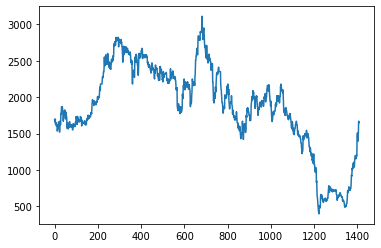

In [73]:
plt.plot(df)

In [74]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [75]:
#scale the data between 0, 1 using MinMaxScaler
#LSTM are very sensitive to the scale of data

scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(np.array(df).reshape(-1,1))

In [76]:
#splitting data into train and test
training_size = int(len(df)*0.65)
test_size = len(df)-training_size 
train_data, test_data = df[0:training_size, :], df[training_size:len(df), :1]

In [77]:
import numpy as np

#convert an array values into a matrix
#for example
# 1 2 3 4 5 6 1 2 3 4 5
# we will get the values in range from 1 to 3 and the next values will be the predicted output 
# dataX       dataY
# 1,2,3       4
# 2,3,4       4
# and so on....

def create_dataset(dataset, temp_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i+time_step, 0])
  return np.array(dataX), np.array(dataY)

In [78]:
#reshape into X = t, t+1, t+2, t+3, and Y = t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [79]:
#reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [80]:
#Create the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [81]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [82]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_7 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [83]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
13/13 [==============================] - 8s 268ms/step - loss: 0.1914 - val_loss: 0.0078
Epoch 2/100
13/13 [==============================] - 2s 184ms/step - loss: 0.0181 - val_loss: 0.0242
Epoch 3/100
13/13 [==============================] - 2s 189ms/step - loss: 0.0055 - val_loss: 0.0206
Epoch 4/100
13/13 [==============================] - 2s 185ms/step - loss: 0.0046 - val_loss: 0.0128
Epoch 5/100
13/13 [==============================] - 2s 184ms/step - loss: 0.0039 - val_loss: 0.0124
Epoch 6/100
13/13 [==============================] - 2s 184ms/step - loss: 0.0034 - val_loss: 0.0114
Epoch 7/100
13/13 [==============================] - 2s 186ms/step - loss: 0.0030 - val_loss: 0.0082
Epoch 8/100
13/13 [==============================] - 2s 189ms/step - loss: 0.0029 - val_loss: 0.0071
Epoch 9/100
13/13 [==============================] - 2s 189ms/step - loss: 0.0027 - val_loss: 0.0060
Epoch 10/100
13/13 [==============================] - 2s 186ms/step - loss: 0.0026 - val_lo

In [85]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [86]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [87]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

2223.423048066997

In [88]:
math.sqrt(mean_squared_error(y_test, test_predict))

1291.961585356757

In [89]:
#Shift train predictions for plotting
look_back = 100
train_predict_plot = np.empty_like(df)
train_predict_plot[:, :] = np.nan
train_predict_plot[look_back:len(train_predict)+look_back, :] = train_predict

In [90]:
#Shift test predictions for plotting
test_predict_plot = np.empty_like(df)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict

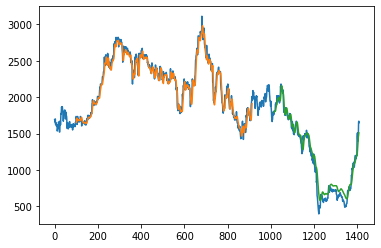

In [91]:
plt.plot(scaler.inverse_transform(df))
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)
plt.show()

In [92]:
print(len(train_data), len(test_data))

915 494


In [93]:
start_range = 394

x_input=test_data[start_range:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [94]:
from numpy import array

lst_output=[]
n_steps= 100
i=0
for i in range(30):
  if(len(temp_input)>100):
      x_input=np.array(temp_input[1:])
      print("{} day input {}".format(i,x_input))
      x_input =x_input.reshape(1,-1)
      x_input = x_input.reshape((1, n_steps, 1))
      yhat = model.predict(x_input, verbose=0)
      print("{} day output {}".format(i,yhat))
      temp_input.extend(yhat[0].tolist())
      temp_input=temp_input[1:]
      lst_output.extend(yhat.tolist())
  else:
      x_input = x_input.reshape((1, n_steps,1))
      yhat = model.predict(x_input, verbose=0)
      temp_input.extend(yhat[0].tolist())
      lst_output.extend(yhat.tolist())
    

print(lst_output)

1 day input [0.08370206 0.08185841 0.08554572 0.09476401 0.09476401 0.08923304
 0.08923304 0.09660767 0.09660767 0.10213864 0.10766962 0.10582596
 0.10213864 0.09845133 0.09292035 0.0910767  0.0910767  0.08738938
 0.08370206 0.08554572 0.08554572 0.08001475 0.06526549 0.06342183
 0.07079646 0.0689528  0.06710914 0.06342183 0.06342183 0.05789086
 0.04682891 0.04129794 0.0339233  0.03945428 0.04314159 0.04129794
 0.03687316 0.04129794 0.03761062 0.04314159 0.05235988 0.05235988
 0.05420354 0.0689528  0.09292035 0.11320059 0.11688791 0.10766962
 0.11688791 0.12241888 0.11688791 0.13716814 0.13532448 0.12979351
 0.13163717 0.12610619 0.11873156 0.13163717 0.12426254 0.12979351
 0.12979351 0.14454277 0.17772861 0.19616519 0.19063422 0.19985251
 0.22935103 0.22382006 0.23119469 0.24410029 0.23119469 0.2570059
 0.25331858 0.23856932 0.24225664 0.26253687 0.23672566 0.24778761
 0.27175516 0.28281711 0.28281711 0.29572271 0.28834808 0.28834808
 0.27912979 0.28097345 0.29572271 0.2920354  0.2994

In [95]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

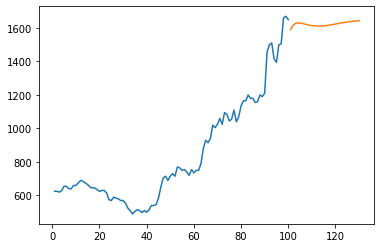

In [96]:
plt.plot(day_new,scaler.inverse_transform(df[len(df)-n_steps:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [97]:
df=df.tolist()
df.extend(lst_output)
df=scaler.inverse_transform(df).tolist()

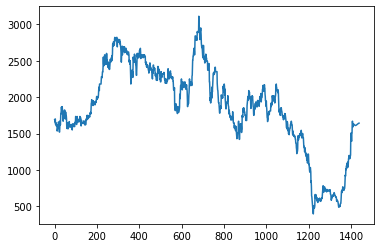

In [98]:
plt.plot(df[:])

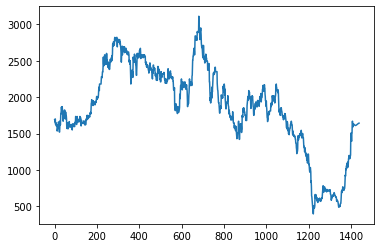

In [99]:
plt.plot(df)